# Network Graph Visualization

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('countries_relationships.csv', index_col = 0)

In [3]:
relationship_df

,target,value
source,,
Germany,Italy,31
France,Germany,26
Germany,Poland,26
Germany,Russia,22
Denmark,Norway,18
...,...,...
India,Papua New Guinea,2
Germany,Iran,2
Denmark,Finland,2


In [4]:
relationship_df = relationship_df.reset_index()

In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Static Graph Visualization with Networx

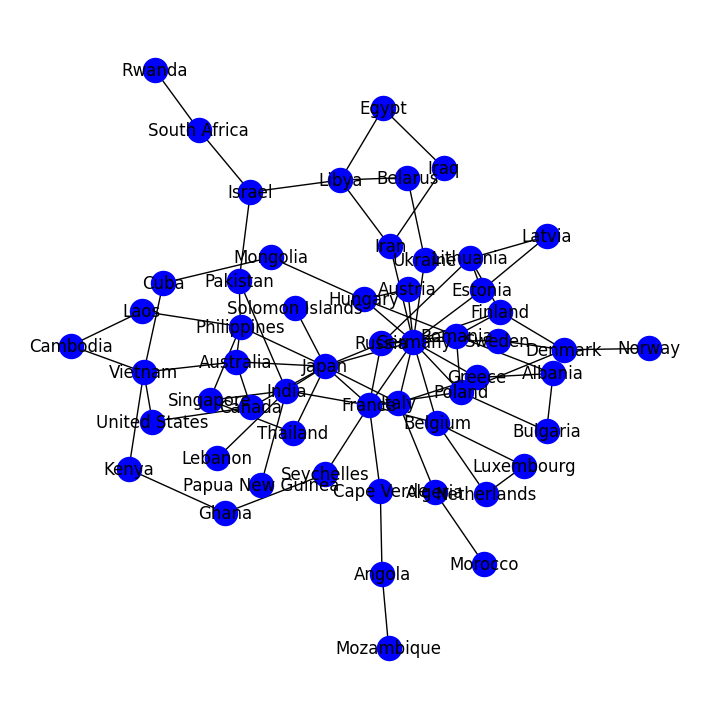

In [6]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'blue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [7]:
h.savefig('networkx_plt_countries.png')

# Dynamic Graph Visualization with Pyvis

In [8]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

countries.html


# Comunity detection with Leiden algorithm

In [9]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'bayanpy', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [10]:
# To solve the problem use this: conda install -c conda-forge python-igraph leidenalg
# check if it works
import igraph
import leidenalg
from cdlib import algorithms

coms = algorithms.leiden(G)

In [11]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [12]:
new_com = coms.to_node_community_map()

In [13]:
new_com

defaultdict(list,
            {'Germany': [0],
             'Poland': [0],
             'Russia': [0],
             'Denmark': [0],
             'Norway': [0],
             'Estonia': [0],
             'Latvia': [0],
             'Albania': [0],
             'Greece': [0],
             'Finland': [0],
             'Lithuania': [0],
             'Austria': [0],
             'Romania': [0],
             'Hungary': [0],
             'Sweden': [0],
             'Bulgaria': [0],
             'India': [1],
             'Pakistan': [1],
             'Japan': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'Australia': [1],
             'Canada': [1],
             'Singapore': [1],
             'Thailand': [1],
             'Lebanon': [1],
             'Papua New Guinea': [1],
             'Egypt': [2],
             'Libya': [2],
             'Israel': [2],
             'South Africa': [2],
             'Ukraine': [2],
             'Iran': [2],
         

In [14]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [15]:
dict_com

{'Germany': 0,
 'Poland': 0,
 'Russia': 0,
 'Denmark': 0,
 'Norway': 0,
 'Estonia': 0,
 'Latvia': 0,
 'Albania': 0,
 'Greece': 0,
 'Finland': 0,
 'Lithuania': 0,
 'Austria': 0,
 'Romania': 0,
 'Hungary': 0,
 'Sweden': 0,
 'Bulgaria': 0,
 'India': 1,
 'Pakistan': 1,
 'Japan': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'Australia': 1,
 'Canada': 1,
 'Singapore': 1,
 'Thailand': 1,
 'Lebanon': 1,
 'Papua New Guinea': 1,
 'Egypt': 2,
 'Libya': 2,
 'Israel': 2,
 'South Africa': 2,
 'Ukraine': 2,
 'Iran': 2,
 'Belarus': 2,
 'Iraq': 2,
 'Rwanda': 2,
 'Cambodia': 3,
 'Vietnam': 3,
 'Cuba': 3,
 'Laos': 3,
 'Kenya': 3,
 'Mongolia': 3,
 'Ghana': 3,
 'United States': 3,
 'France': 4,
 'Angola': 4,
 'Mozambique': 4,
 'Cape Verde': 4,
 'Belgium': 4,
 'Netherlands': 4,
 'Luxembourg': 4,
 'Seychelles': 4,
 'Italy': 5,
 'Algeria': 5,
 'Morocco': 5}

In [16]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


OBSERVATIONS
first impression: the result does not seem to reflect the relationships of countries in the 20th century in a propper way. for instance:
- the role of the United States seems totaly disproportionate,
- no connection at all between Germany and the United States or Germany and Israel is not reflecting history of the 20th century
- no representation of colonial structures (the red community where France and the Benelux Countries are included does not make sense to me, Kongo and Algeria are not even part of the Network)
  and these are only some examples.
- nevertheless there seem to be some sense in the communities, somehow the grouping of the countries follows geographical patterns (rather european, rather asian, rather african...) which is plausible. also the connection of Germany and Poland or Germany with its allies Italy and Japan in the Second World War is plausible. 
But this mach is also missleading: at a first short view it seems plausible - "strong connection Germany-Poland-Russia = system seems to work". But than in detail it does not at all.
- for sure one of the reasons is again the mistakes or inconsitencies in the list of countries (without aliases) Again it leads to strange results. (United Kingdom is not even part of this relationship list) But I wonder if this is the only souzrce of mistake - I guess not. What becomes clear that it needs a lot of control double check and eventually revision with better functioning systems

# Different methods to demonstrate importance within a network

In [17]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Germany': 0.25925925925925924,
 'Italy': 0.09259259259259259,
 'France': 0.16666666666666666,
 'Poland': 0.09259259259259259,
 'Russia': 0.09259259259259259,
 'Denmark': 0.07407407407407407,
 'Norway': 0.018518518518518517,
 'India': 0.1111111111111111,
 'Pakistan': 0.05555555555555555,
 'Japan': 0.18518518518518517,
 'Egypt': 0.037037037037037035,
 'Libya': 0.07407407407407407,
 'Estonia': 0.05555555555555555,
 'Latvia': 0.037037037037037035,
 'Albania': 0.05555555555555555,
 'Greece': 0.05555555555555555,
 'Cambodia': 0.037037037037037035,
 'Vietnam': 0.09259259259259259,
 'Israel': 0.05555555555555555,
 'South Africa': 0.037037037037037035,
 'Finland': 0.07407407407407407,
 'Lithuania': 0.07407407407407407,
 'Cuba': 0.037037037037037035,
 'Philippines': 0.09259259259259259,
 'Ukraine': 0.037037037037037035,
 'Austria': 0.037037037037037035,
 'Solomon Islands': 0.018518518518518517,
 'Australia': 0.07407407407407407,
 'Canada': 0.05555555555555555,
 'Romania': 0.09259259259259259,


In [18]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [19]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

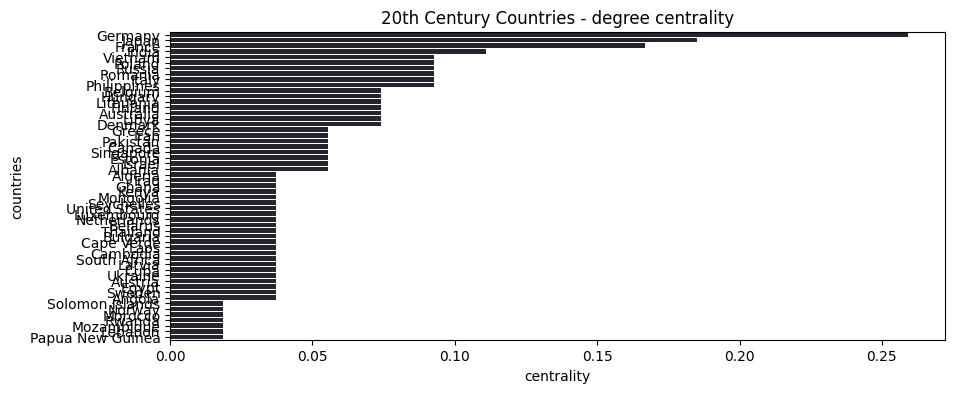

In [20]:
# Plot the degree centrality
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Countries - degree centrality")

there are too many countries for a clear bar chart, therefore I'll do it again with the top 30

In [21]:
degree_df_top = degree_df.sort_values(
    by="centrality", ascending=False
).head(30)

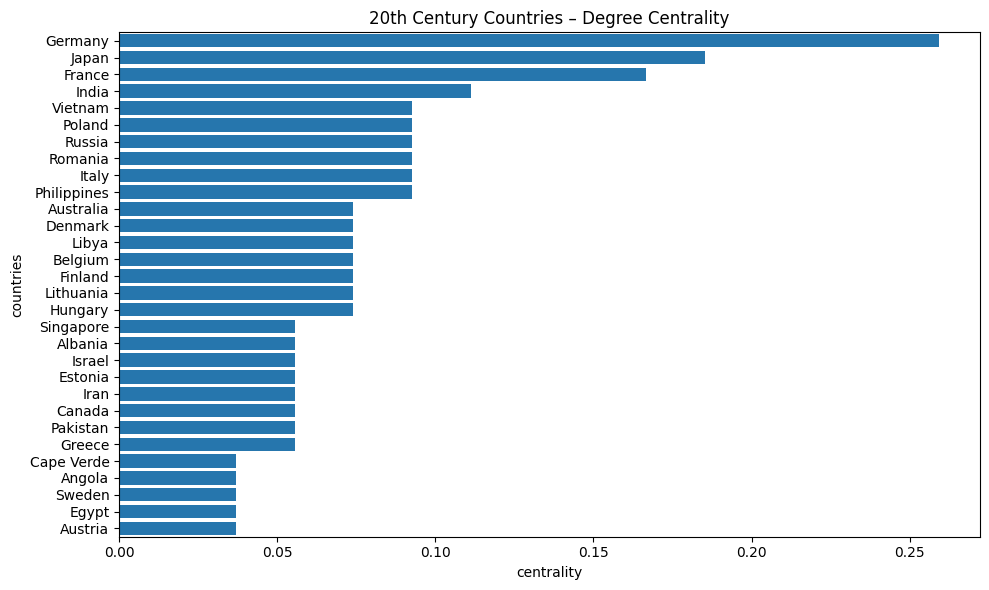

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="centrality",
    y="countries",
    data=degree_df_top,
    saturation=0.9
)
plt.title("20th Century Countries – Degree Centrality")
plt.tight_layout()
plt.show()


COMMENT:
as the database remains the same, the results  remain wrong or strange, no matter which calculation method is used. This is an observation for all of the folloiwing calculations

In [23]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [24]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

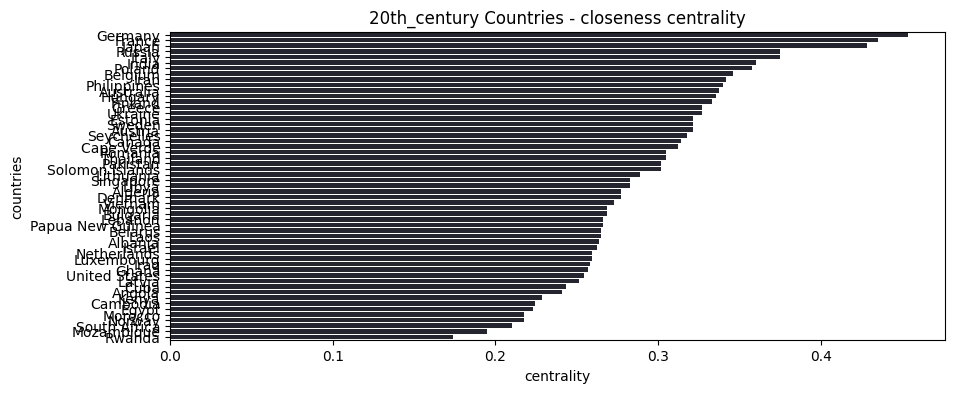

In [25]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th_century Countries - closeness centrality")

In [26]:
# reduction of countries 
closeness_df_top = closeness_df.sort_values(
    by="centrality", ascending=False
).head(30)

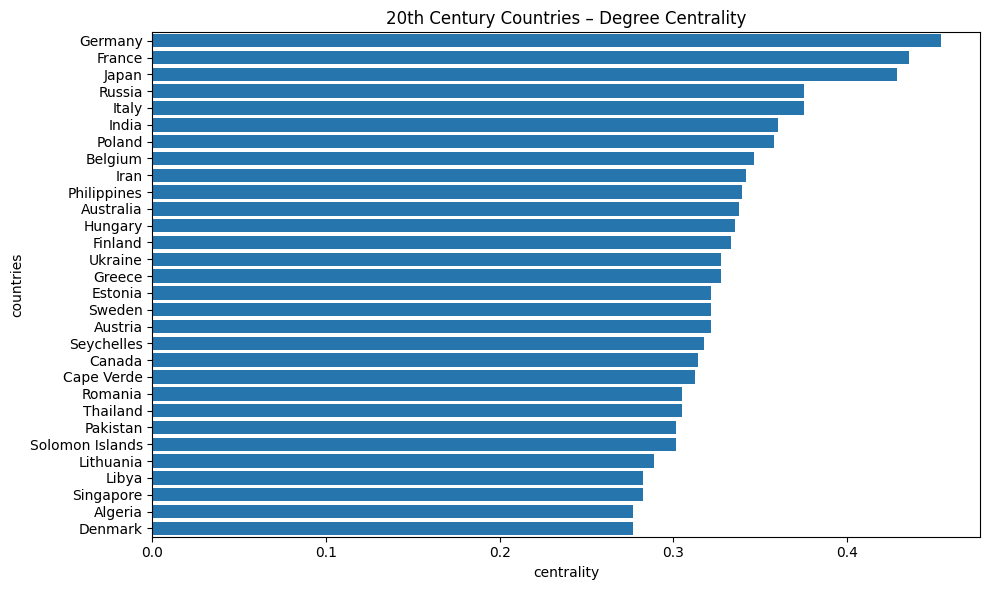

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="centrality",
    y="countries",
    data=closeness_df_top,
    saturation=0.9
)
plt.title("20th Century Countries – Degree Centrality")
plt.tight_layout()
plt.show()


In [28]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [29]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

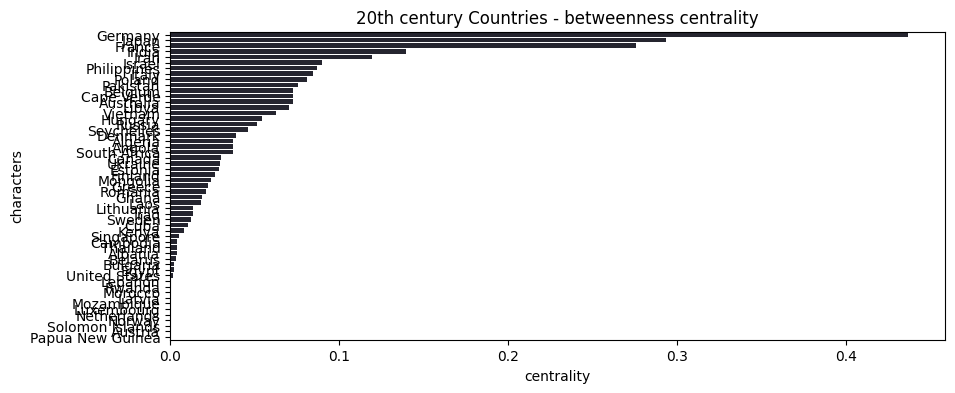

In [30]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("20th century Countries - betweenness centrality")

In [31]:
betweennes_df_top = betweennes_df.sort_values(
    by="centrality", ascending=False
).head(30)

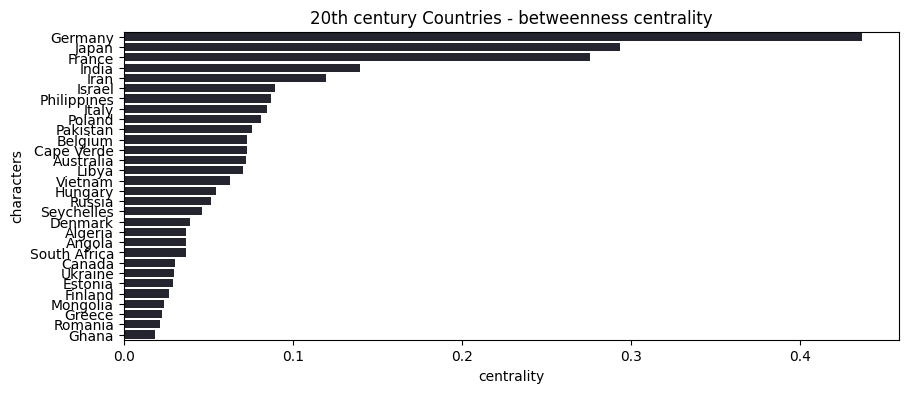

In [32]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df_top).set_title("20th century Countries - betweenness centrality")